In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

In [2]:
def show_genres(df):
    unique_genres = sorted(
    set(
        genre.strip()
        for genre_list in df['genre']
        for genre in genre_list.split(',')
        if genre.strip()
        )
    )

    print(unique_genres)

def show_top_genres(df):
    class_counts = df['genre'].value_counts()
    top_n = 20  
    top_classes = class_counts.head(top_n)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_classes.values, y=top_classes.index, palette="viridis")
    plt.title("Top Genres by Number of Samples")
    plt.xlabel("Number of Samples")
    plt.ylabel("Genre")
    plt.tight_layout()
    plt.show()

def show_top_genres_singly(df):
    all_genres = []

    for genre_string in df['genre']:
        genres = [g.strip() for g in genre_string.split(',') if g.strip()]
        all_genres.extend(genres)
        
    genre_counts = Counter(all_genres)
    genre_counts_df = pd.DataFrame(genre_counts.items(), columns=['genre', 'count'])
    genre_counts_df = genre_counts_df.sort_values(by='count', ascending=False).reset_index(drop=True)

    top_n = 20  
    top_classes = genre_counts_df.head(top_n)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_classes['count'], y=top_classes['genre'], palette="viridis")
    plt.title("Top Genres (singly) by Number of Samples")
    plt.xlabel("Number of Samples")
    plt.ylabel("Genre")
    plt.tight_layout()
    plt.show()

## Первая версия датасета практически со всеми жанрами

In [3]:
df = pd.read_csv('merged_genre_lyrics.csv')

df

,genre,lyrics
0,"soul,electropop,hip hop",[Verse 1] This shit remind me of how... look T...
1,pop; dance,"I was looking lost, it was cold outside\nThe w..."
2,rock,[Текст песни Искал тебя]\n\n[Куплет]\nИскал те...
3,pop,No use of talkin' no use of talkin'\nYou'll st...
4,pop,"I can still hear your voice in my head, louder..."
...,...,...
4609716,pop,"[Intro]\nFlashback to 2020, things get pretty ..."
4609717,misc,"Second Joint Debate, At Freeport,\n\nAugust 27..."
4609718,folk,[Verse] There are so many things That God has ...
4609719,rock,Standing on the edge of false promises\nYou th...


In [4]:
df['genre'].value_counts()

genre
pop                              1478875
rap                              1074715
rock                              761333
hip-hop                           207700
rb                                159583
                                  ...   
pop,math rock,indie rock               1
shoegaze,grunge,post-hardcore          1
electronic,k-pop,pop                   1
metalcore,christian                    1
ambient,hip hop,lo-fi                  1
Name: count, Length: 4857, dtype: int64

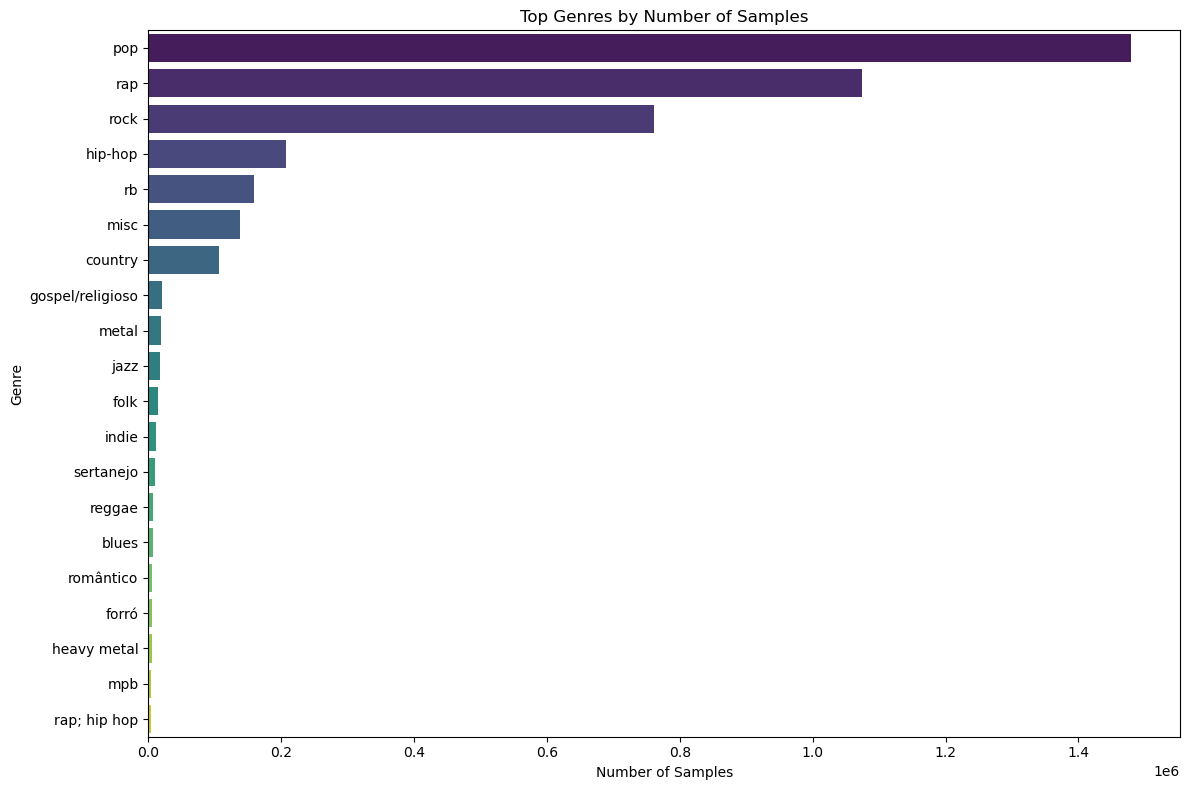

In [5]:
show_top_genres(df)

In [6]:
# Заменим все нестандартные разделители на запятую
df['genre'] = df['genre'].str.replace(r'[;/:\|]', ',', regex=True)
# Удалим лишние пробелы вокруг жанров и между запятыми
df['genre'] = df['genre'].apply(lambda x: ','.join([g.strip() for g in x.split(',')]))

list(df['genre'].value_counts().index)

['pop',
 'rap',
 'rock',
 'hip-hop',
 'rb',
 'misc',
 'country',
 'gospel,religioso',
 'metal',
 'jazz',
 'folk',
 'indie',
 'sertanejo',
 'rap,hip hop',
 'reggae',
 'blues',
 'romântico',
 'forró',
 'heavy metal',
 'mpb',
 'electronic',
 'soul',
 'r&b',
 'sertanejo,romântico',
 'rock,pop,alternative rock',
 'j-pop,j-rock',
 'samba',
 'hip hop,rap',
 'hip hop,trap',
 'mpb,romântico',
 'rap,hip hop,trap',
 'rock,heavy metal,metal',
 'trap',
 'hip hop,rap,black music',
 'rock,alternative rock,indie rock',
 'pop,rock',
 'indie rock',
 'rock,alternative rock,punk',
 'rock,hard rock,heavy metal',
 'rap,hip-hop,hip hop',
 'funk carioca',
 'punk rock',
 'indie pop',
 'romântico,sertanejo,country',
 'heavy metal,rock,hard rock',
 'punk',
 'trap,hip hop',
 'sertanejo,romântico,country',
 'velha guarda',
 'hip-hop,hip hop',
 'axé',
 'rap,hip hop,black music',
 'rock,electronic,synthpop',
 'classical',
 'heavy metal,hard rock,rock',
 'indie,rock',
 'rock,electronic,alternative rock',
 'rock,tranc

In [7]:
# Удаляем тире перед жанрами
def remove_leading_dashes(s):
    genres = s.split(',')
    cleaned = [genre.lstrip('- ').strip() for genre in genres if genre.strip()]
    return ','.join(cleaned)

df['genre'] = df['genre'].apply(remove_leading_dashes)

list(df['genre'].value_counts().index)

['pop',
 'rap',
 'rock',
 'hip-hop',
 'rb',
 'misc',
 'country',
 'gospel,religioso',
 'metal',
 'jazz',
 'folk',
 'indie',
 'sertanejo',
 'rap,hip hop',
 'reggae',
 'blues',
 'romântico',
 'forró',
 'heavy metal',
 'mpb',
 'electronic',
 'soul',
 'r&b',
 'sertanejo,romântico',
 'rock,pop,alternative rock',
 'j-pop,j-rock',
 'samba',
 'hip hop,rap',
 'hip hop,trap',
 'mpb,romântico',
 'rap,hip hop,trap',
 'rock,heavy metal,metal',
 'trap',
 'hip hop,rap,black music',
 'rock,alternative rock,indie rock',
 'pop,rock',
 'indie rock',
 'rock,alternative rock,punk',
 'rock,hard rock,heavy metal',
 'rap,hip-hop,hip hop',
 'funk carioca',
 'punk rock',
 'indie pop',
 'romântico,sertanejo,country',
 'heavy metal,rock,hard rock',
 'punk',
 'trap,hip hop',
 'sertanejo,romântico,country',
 'velha guarda',
 'hip-hop,hip hop',
 'axé',
 'rap,hip hop,black music',
 'rock,electronic,synthpop',
 'classical',
 'heavy metal,hard rock,rock',
 'indie,rock',
 'rock,electronic,alternative rock',
 'rock,tranc

In [8]:
# Все жанры
show_genres(df)

['acoustic', 'afrobeat', 'alt-country', 'alt-rock', 'alternative', 'alternative rock', 'ambient', 'anime', 'axé', 'black metal', 'black music', 'black-metal', 'bluegrass', 'blues', 'bossa nova', 'brazil', 'breakbeat', 'british', 'britpop', 'chill', 'chillout', 'chillwave', 'christian', 'classic rock', 'classical', 'cloud rap', 'club', 'clássico', 'coletânea', 'comedy', 'country', 'dance', 'dancehall', 'death metal', 'death-metal', 'deathcore', 'deep-house', 'disco', 'disney', 'doom metal', 'dream pop', 'drum and bass', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electro swing', 'electronic', 'electronica', 'electropop', 'emo', 'emo rap', 'emocore', 'experimental', 'fado', 'folk', 'forró', 'french', 'funk', 'funk carioca', 'garage', 'garage rock', 'german', 'gospel', 'goth', 'grime', 'grindcore', 'groove', 'grunge', 'guitar', 'gótico', 'hard rock', 'hard-rock', 'hardcore', 'heavy metal', 'heavy-metal', 'hip hop', 'hip-hop', 'honky-tonk', 'house', 'indian', 'indie', 'indie pop'

In [9]:
# Внутри жанров заменяем пробелы на дефисы
def replace_spaces_in_genres(s):
    genres = s.split(',')
    cleaned = [genre.strip().replace(' ', '-') for genre in genres if genre.strip()]
    return ','.join(cleaned)

df['genre'] = df['genre'].apply(replace_spaces_in_genres)

In [10]:
show_genres(df)

['acoustic', 'afrobeat', 'alt-country', 'alt-rock', 'alternative', 'alternative-rock', 'ambient', 'anime', 'axé', 'black-metal', 'black-music', 'bluegrass', 'blues', 'bossa-nova', 'brazil', 'breakbeat', 'british', 'britpop', 'chill', 'chillout', 'chillwave', 'christian', 'classic-rock', 'classical', 'cloud-rap', 'club', 'clássico', 'coletânea', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deathcore', 'deep-house', 'disco', 'disney', 'doom-metal', 'dream-pop', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electro-swing', 'electronic', 'electronica', 'electropop', 'emo', 'emo-rap', 'emocore', 'experimental', 'fado', 'folk', 'forró', 'french', 'funk', 'funk-carioca', 'garage', 'garage-rock', 'german', 'gospel', 'goth', 'grime', 'grindcore', 'groove', 'grunge', 'guitar', 'gótico', 'hard-rock', 'hardcore', 'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'indian', 'indie', 'indie-pop', 'indie-rock', 'industrial', 'infantil', 'instrumental', 'j-dance', 'j-idol', 'j-pop'

In [11]:
# удаляем нежанры (типа которые реально не жанры) либо просто плохие лейблы
# если этот жанр один - удаляем строку полностью
# если жанров несколько - удаляем только его из списка
genres_to_remove = ['black-music', 'brazil', 'british', 'coletânea',
                    'disney', 'experimental', 'french', 'german', 'na',
                    'guitar', 'indian', 'infantil', 'instrumental', 'misc',
                    'latin', 'malay', 'mandopop', 'piano', 'comedy',
                    'progressivo', 'regional', 'romântico', 'soundtrack',
                    'swedish', 'trilha-sonora', 'turkish', 'urban',
                    'velha-guarda', 'world-music', 'acoustic', 'anime',]

def clean_genres(genre_string, genres_to_remove):
    genres = [g.strip() for g in genre_string.split(',') if g.strip()]
    cleaned = [g for g in genres if g not in genres_to_remove]
    
    if not cleaned:
        return None
    return ','.join(cleaned)

df['genre'] = df['genre'].apply(lambda x: clean_genres(x, genres_to_remove))
df = df[df['genre'].notna()].reset_index(drop=True)

In [12]:
# Словарь маппинга: что заменить -> на что
genre_mapping = {
    '-and-': '&',
    '-and-'
    '-n-': '&',
    'rb': 'r&b',
    'rnb': 'r&b',
    'r-n-b': 'r&b',
    'hiphop': 'hip-hop',
    'electro': 'electronic',
    'alternative-rock': 'alt-rock',
    'rock-alternativo': 'alt-rock',
    'lofi': 'lo-fi',
    'chill': 'chillout',
    'christian': 'religion',
    'clássico': 'classical',
    'club': 'dance',
    'gospel': 'religion',
    'goth': 'gothic',
    'gótico': 'gothic',
    'psicodelia': 'psychedelic',
    'psych-rock': 'psychedelic-rock',
    'pós-punk': 'post-punk',
    'religioso': 'religion',
    'samba-enredo': 'samba',
    'soul-music': 'soul',
    'surf-music': 'surf',
    'synthpop': 'synth-pop',
    'trop-house': 'tropical-house',
    'worship': 'religion',
    'electropop': 'electro-pop',
    'emocore': 'emo-core',
    'drum-and-bass': 'drum&bass',
    'tecnopop': 'electro-pop',
    'j-dance': 'j-pop',
    'j-idol': 'j-pop',
    'garage': 'garage-rock'
}

def map_genres(genre_string, mapping):
    genres = genre_string.split(',')
    cleaned = []
    for genre in genres:
        g = genre.strip().lower()
        g = mapping.get(g, g)
        cleaned.append(g)
    return ','.join(cleaned)

df['genre'] = df['genre'].apply(lambda x: map_genres(x, genre_mapping))

In [13]:
show_genres(df)

['afrobeat', 'alt-country', 'alt-rock', 'alternative', 'ambient', 'axé', 'black-metal', 'bluegrass', 'blues', 'bossa-nova', 'breakbeat', 'britpop', 'chillout', 'chillwave', 'classic-rock', 'classical', 'cloud-rap', 'country', 'dance', 'dancehall', 'death-metal', 'deathcore', 'deep-house', 'disco', 'doom-metal', 'dream-pop', 'drum&bass', 'dub', 'dubstep', 'edm', 'electro-pop', 'electro-swing', 'electronic', 'electronica', 'emo', 'emo-core', 'emo-rap', 'fado', 'folk', 'forró', 'funk', 'funk-carioca', 'garage-rock', 'gothic', 'grime', 'grindcore', 'groove', 'grunge', 'hard-rock', 'hardcore', 'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'indie', 'indie-pop', 'indie-rock', 'industrial', 'j-pop', 'j-rock', 'jazz', 'jovem-guarda', 'k-pop', 'k-rock', 'kizomba', 'lo-fi', 'math-rock', 'melodic-death-metal', 'metal', 'metalcore', 'minimal-techno', 'mpb', 'músicas-gaúchas', 'new-age', 'new-wave', 'nu-metal', 'opera', 'pagode', 'piano-rock', 'piseiro', 'pop', 'pop-punk', 'pop-rock', 'post-hardc

In [14]:
# Чистим дублирующиеся жанры
def remove_duplicate_genres(genre_string):
    seen = set()
    result = []
    for g in genre_string.split(','):
        genre = g.strip()
        if genre and genre not in seen:
            seen.add(genre)
            result.append(genre)
    return ','.join(result)

df['genre'] = df['genre'].apply(remove_duplicate_genres)

In [15]:
# Сортируем списки жанров в алфавитном порядке
# Чтобы например не было отдельно жанра rap,hip-hop и hip-hop,rap
def sort_genres_alphabetically(genre_string):
    genres = [g.strip() for g in genre_string.split(',') if g.strip()]
    return ','.join(sorted(genres))

df['genre'] = df['genre'].apply(sort_genres_alphabetically)

In [16]:
df

,genre,lyrics
0,"electro-pop,hip-hop,soul",[Verse 1] This shit remind me of how... look T...
1,"dance,pop","I was looking lost, it was cold outside\nThe w..."
2,rock,[Текст песни Искал тебя]\n\n[Куплет]\nИскал те...
3,pop,No use of talkin' no use of talkin'\nYou'll st...
4,pop,"I can still hear your voice in my head, louder..."
...,...,...
4453810,r&b,"(VERSE)\nGirl, we can make it right\nThere's n..."
4453811,rap,[Royal T]\nNow if you wanna get served step up...
4453812,pop,"[Intro]\nFlashback to 2020, things get pretty ..."
4453813,folk,[Verse] There are so many things That God has ...


In [17]:
# Еще немного обработки текстов
df['lyrics'] = df['lyrics'].str.replace('\n', ' ', regex=False)
df['lyrics'] = df['lyrics'].str.replace(r'\s+', ' ', regex=True).str.strip()
df = df.drop_duplicates(subset=['lyrics']).reset_index(drop=True)

In [18]:
df

,genre,lyrics
0,"electro-pop,hip-hop,soul",[Verse 1] This shit remind me of how... look T...
1,"dance,pop","I was looking lost, it was cold outside The wh..."
2,rock,[Текст песни Искал тебя] [Куплет] Искал тебя в...
3,pop,No use of talkin' no use of talkin' You'll sta...
4,pop,"I can still hear your voice in my head, louder..."
...,...,...
3900388,pop,[Verse 1] I know some girls from 'round my way...
3900389,rap,"Bish we goin' see, we goin' see, Yeah I'm in y..."
3900390,rap,[Royal T] Now if you wanna get served step up ...
3900391,pop,"[Intro] Flashback to 2020, things get pretty h..."


In [19]:
# Найдем все жанры, которые не встречаются по одиночке и удалим
single_genre_counts = df[df['genre'].str.count(',') == 0]['genre'].value_counts()

all_genres = []

for genre_string in df['genre']:
    genres = [g.strip() for g in genre_string.split(',') if g.strip()]
    all_genres.extend(genres)

all_genre_counts = Counter(all_genres)
genres_without_solo = [genre for genre in all_genre_counts if genre not in single_genre_counts]
genres_to_remove = sorted(genres_without_solo)
print(genres_to_remove)

df['genre'] = df['genre'].apply(lambda x: clean_genres(x, genres_to_remove))
df = df[df['genre'].notna()].reset_index(drop=True)

['emo-core', 'k-rock', 'músicas-gaúchas', 'piseiro', 'post-rock', 'surf']


In [20]:
show_genres(df)

['afrobeat', 'alt-country', 'alt-rock', 'alternative', 'ambient', 'axé', 'black-metal', 'bluegrass', 'blues', 'bossa-nova', 'breakbeat', 'britpop', 'chillout', 'chillwave', 'classic-rock', 'classical', 'cloud-rap', 'country', 'dance', 'dancehall', 'death-metal', 'deathcore', 'deep-house', 'disco', 'doom-metal', 'dream-pop', 'drum&bass', 'dub', 'dubstep', 'edm', 'electro-pop', 'electro-swing', 'electronic', 'electronica', 'emo', 'emo-rap', 'fado', 'folk', 'forró', 'funk', 'funk-carioca', 'garage-rock', 'gothic', 'grime', 'grindcore', 'groove', 'grunge', 'hard-rock', 'hardcore', 'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'indie', 'indie-pop', 'indie-rock', 'industrial', 'j-pop', 'j-rock', 'jazz', 'jovem-guarda', 'k-pop', 'kizomba', 'lo-fi', 'math-rock', 'melodic-death-metal', 'metal', 'metalcore', 'minimal-techno', 'mpb', 'new-age', 'new-wave', 'nu-metal', 'opera', 'pagode', 'piano-rock', 'pop', 'pop-punk', 'pop-rock', 'post-hardcore', 'post-punk', 'power-metal', 'power-pop', 'prog

In [21]:
# Выведем жанры, которые встречаются менее 100 раз
genre_counter = Counter()

for genre_string in df['genre']:
    genres = [g.strip() for g in genre_string.split(',') if g.strip()]
    genre_counter.update(genres)

rare_genres = {genre: count for genre, count in genre_counter.items() if count < 100}

for genre in sorted(rare_genres):
    print(f"{genre}: {rare_genres[genre]}")

afrobeat: 2
bluegrass: 62
breakbeat: 13
deep-house: 14
edm: 79
electro-swing: 28
grindcore: 42
groove: 90
honky-tonk: 78
minimal-techno: 6
opera: 45
progressive-house: 31
salsa: 1
show-tunes: 19


In [23]:
# Сольем с другими жанрами, а некоторые удалим т.к. к остальным не подходят
genres_to_remove = ['groove', 'opera', 'salsa']
df['genre'] = df['genre'].apply(lambda x: clean_genres(x, genres_to_remove))
df = df[df['genre'].notna()].reset_index(drop=True)

genre_mapping = {
    'afrobeat': 'funk',
    'bluegrass': 'folk',
    'breakbeat': 'electronic',
    'deep-house': 'house',
    'edm': 'electronic',
    'electro-swing': 'electronic',
    'grindcore': 'death-metal',
    'honky-tonk': 'country',
    'minimal-techno': 'techno',
    'progressive-house': 'house',
    'show-tunes': 'pop'
}
df['genre'] = df['genre'].apply(lambda x: map_genres(x, genre_mapping))
df['genre'] = df['genre'].apply(remove_duplicate_genres)

In [24]:
# Очищаем от пустых строк
df = df[df['lyrics'].apply(lambda x: isinstance(x, str) and x.strip() != '')].reset_index(drop=True)

In [25]:
# Очищаем от текстов, в которых нет слов
def has_words(text):
    if not isinstance(text, str):
        return False
    return bool(re.search(r'\b[а-яА-ЯёЁa-zA-Z]{2,}\b', text))

df = df[df['lyrics'].apply(has_words)].reset_index(drop=True)

In [26]:
# Добавим метку языка
# Если в тексте есть 2 слова по русски то текст НАШ
def detect_language(text):
    russian_words = re.findall(r'\b[а-яёА-ЯЁ]{2,}\b', text)
    if len(russian_words) >= 2:
        return 'russian'
    return 'english'
    
df['language'] = df['lyrics'].apply(detect_language)

language_percentages = df['language'].value_counts(normalize=True) * 100
print(language_percentages.round(2))

language
english    95.79
russian     4.21
Name: proportion, dtype: float64


In [27]:
show_genres(df)

['alt-country', 'alt-rock', 'alternative', 'ambient', 'axé', 'black-metal', 'blues', 'bossa-nova', 'britpop', 'chillout', 'chillwave', 'classic-rock', 'classical', 'cloud-rap', 'country', 'dance', 'dancehall', 'death-metal', 'deathcore', 'disco', 'doom-metal', 'dream-pop', 'drum&bass', 'dub', 'dubstep', 'electro-pop', 'electronic', 'electronica', 'emo', 'emo-rap', 'fado', 'folk', 'forró', 'funk', 'funk-carioca', 'garage-rock', 'gothic', 'grime', 'grunge', 'hard-rock', 'hardcore', 'heavy-metal', 'hip-hop', 'house', 'indie', 'indie-pop', 'indie-rock', 'industrial', 'j-pop', 'j-rock', 'jazz', 'jovem-guarda', 'k-pop', 'kizomba', 'lo-fi', 'math-rock', 'melodic-death-metal', 'metal', 'metalcore', 'mpb', 'new-age', 'new-wave', 'nu-metal', 'pagode', 'piano-rock', 'pop', 'pop-punk', 'pop-rock', 'post-hardcore', 'post-punk', 'power-metal', 'power-pop', 'progressive-metal', 'progressive-rock', 'psychedelic', 'psychedelic-rock', 'punk', 'punk-rock', 'r&b', 'rap', 'reggae', 'reggaeton', 'religion',

In [28]:
df

,genre,lyrics,language
0,"electro-pop,hip-hop,soul",[Verse 1] This shit remind me of how... look T...,english
1,"dance,pop","I was looking lost, it was cold outside The wh...",english
2,rock,[Текст песни Искал тебя] [Куплет] Искал тебя в...,russian
3,pop,No use of talkin' no use of talkin' You'll sta...,english
4,pop,"I can still hear your voice in my head, louder...",english
...,...,...,...
3900239,pop,[Verse 1] I know some girls from 'round my way...,english
3900240,rap,"Bish we goin' see, we goin' see, Yeah I'm in y...",english
3900241,rap,[Royal T] Now if you wanna get served step up ...,english
3900242,pop,"[Intro] Flashback to 2020, things get pretty h...",english


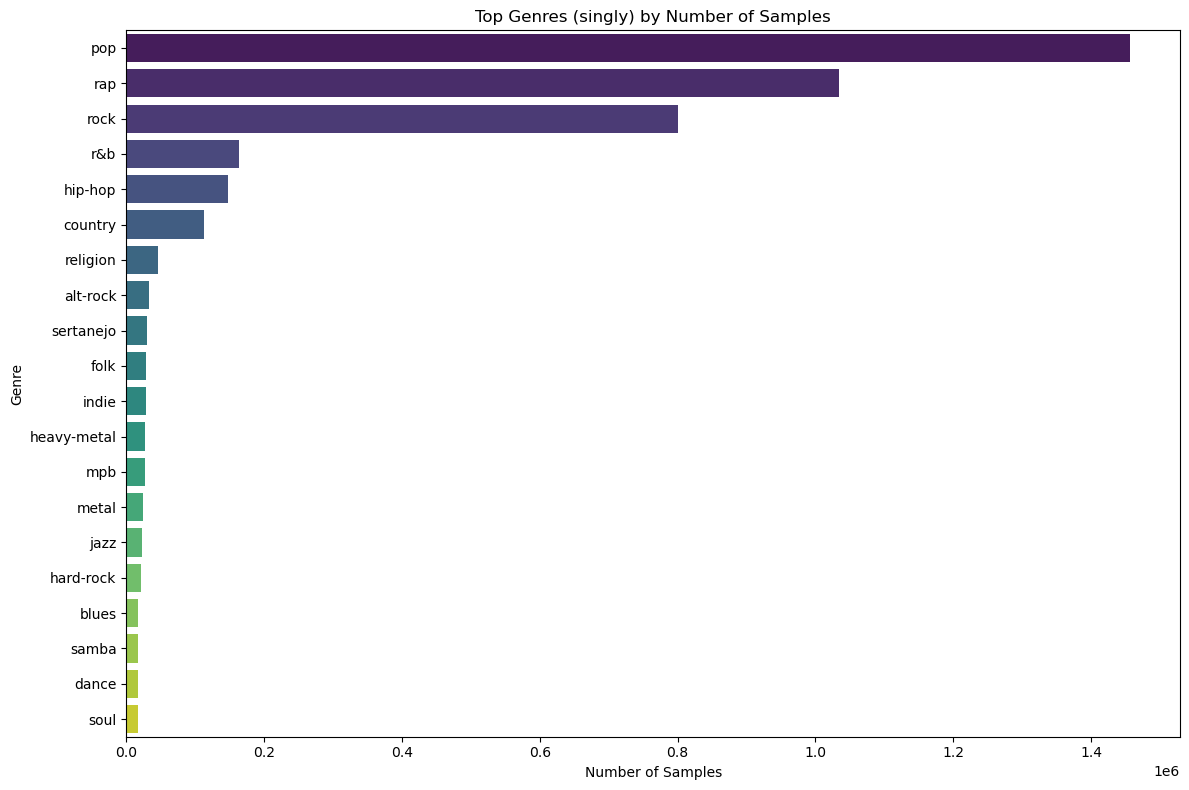

In [29]:
# Топ жанров (всего 102)
show_top_genres_singly(df)

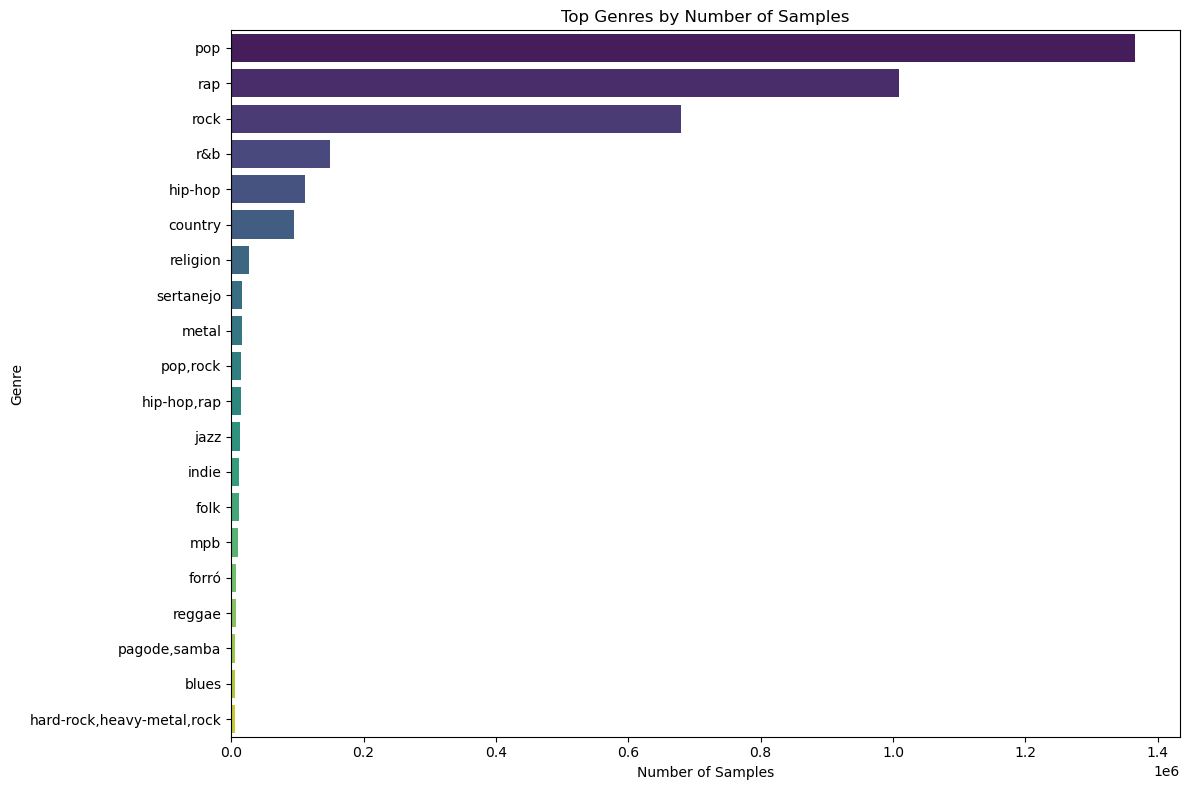

In [30]:
# Топ жанров (как есть)
show_top_genres(df)

In [31]:
df.to_csv('all_genres.csv', index=False)
df.to_parquet('all_genres.parquet', index=False)

## Даунсэмплинг первой версии

In [32]:
df_downsampled = df.copy()

In [33]:
# Как видите у нас сильно выделяются pop, rap и rock
# Чтобы маломальски пофиксить дисбаланс классов сведем эти жанры хотя бы к кол-ву r&b
max_samples = int(df[df['genre']=='r&b']['genre'].count()) # r&b
max_samples

148856

In [34]:
# Удалять будем только английские песни т.к. русских у нас и так мало
# Таким образом мы балансим как жанры, так и языки
genre_limits = {
    'pop': max_samples,
    'rap': max_samples,
    'rock': max_samples
}

def downsample_single_genre_english(df, genre_name, max_count):
    exact_genre_mask = (df['genre'] == genre_name)
    
    df_target = df[exact_genre_mask]
    df_other = df[~exact_genre_mask]

    df_russian = df_target[df_target['language'] == 'russian']
    df_english = df_target[df_target['language'] == 'english']

    n_allowed_english = max_count - len(df_russian)
    
    if n_allowed_english <= 0:
        df_final = df_russian
    else:
        df_english_sampled = df_english.sample(n=min(n_allowed_english, len(df_english)), random_state=42)
        df_final = pd.concat([df_russian, df_english_sampled])
    
    return pd.concat([df_other, df_final]).reset_index(drop=True)

for genre, limit in genre_limits.items():
    df_downsampled = downsample_single_genre_english(df_downsampled, genre, limit)

In [35]:
# Баланс языков в этих жанрах
top_3 = ['pop', 'rap', 'rock']

for genre in top_3:
    language_percentages = df_downsampled[df_downsampled['genre']==genre]['language'].value_counts(normalize=True) * 100
    print(genre, '='*12)
    print(language_percentages.round(2), '\n')

pop ============
language
english    79.59
russian    20.41
Name: proportion, dtype: float64 

rap ============
language
russian    73.28
english    26.72
Name: proportion, dtype: float64 

rock ============
language
english    87.01
russian    12.99
Name: proportion, dtype: float64 



In [36]:
# Общий баланс
language_percentages = df_downsampled['language'].value_counts(normalize=True) * 100
print(language_percentages.round(2))

language
english    87.32
russian    12.68
Name: proportion, dtype: float64


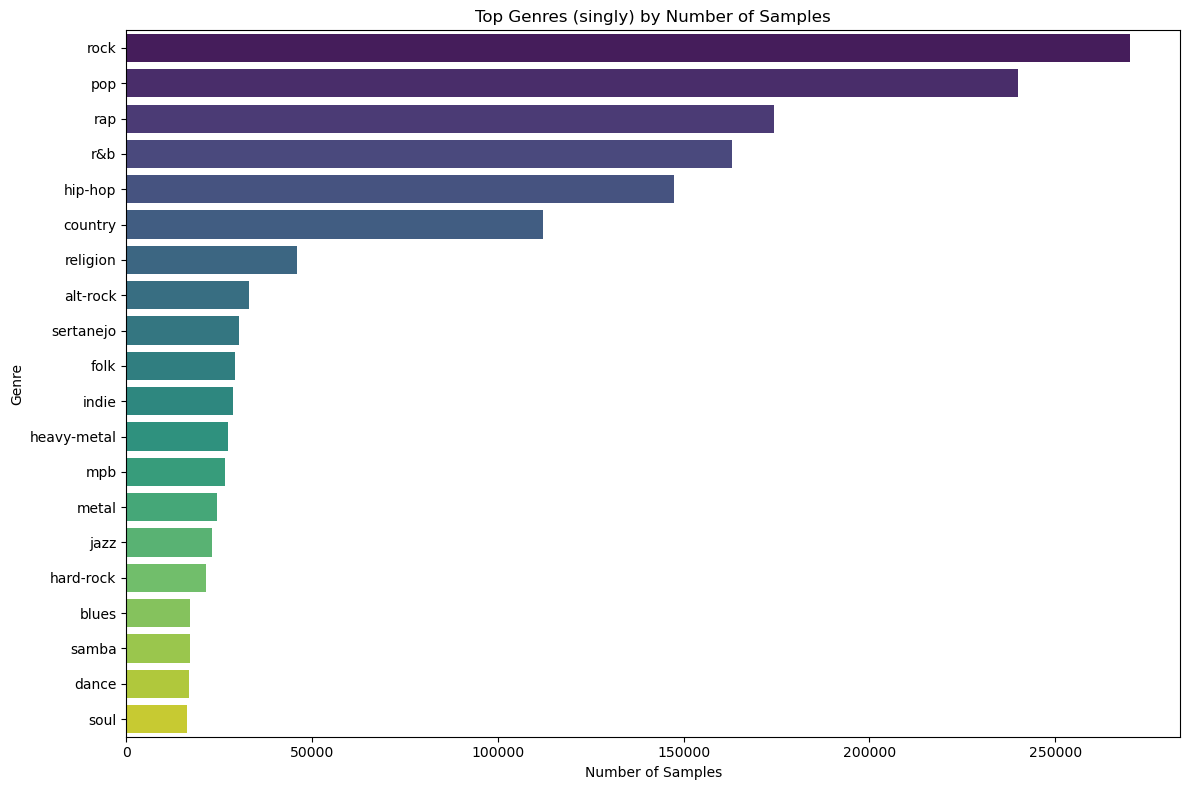

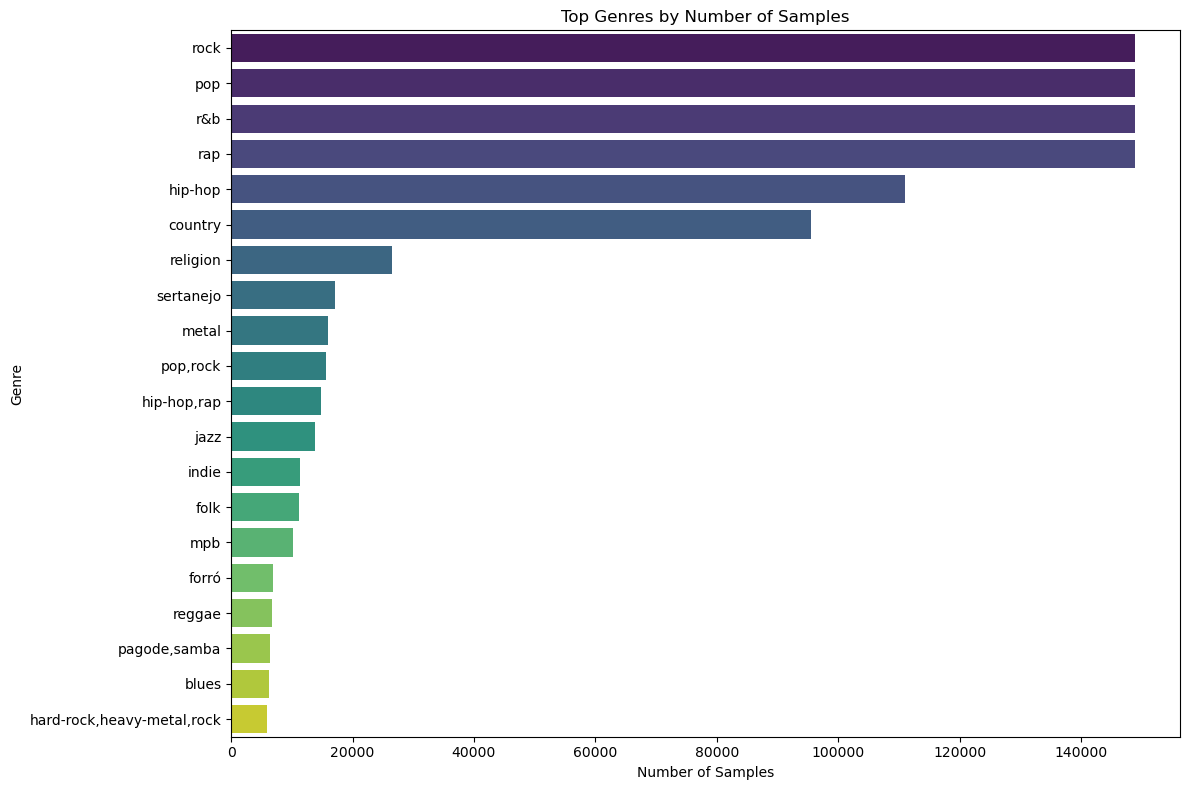

In [37]:
show_top_genres_singly(df_downsampled)
show_top_genres(df_downsampled)

In [38]:
df_downsampled

,genre,lyrics,language
0,"electro-pop,hip-hop,soul",[Verse 1] This shit remind me of how... look T...,english
1,"dance,pop","I was looking lost, it was cold outside The wh...",english
2,hip-hop,I don't care what you say to me. Just forget t...,english
3,country,"Ive been exalted, cried from the pulpit but Im...",english
4,"j-pop,j-rock",Kaki naguru fuan no katasumi ni Eien wo negau ...,english
...,...,...,...
1294049,rock,[Verse 1] What will it take to make you believ...,english
1294050,rock,"Lord, Help me walk Another mile, just one more...",english
1294051,rock,"[Verse 1] Well, wearing any face can help you ...",english
1294052,rock,"Trapped in Hell, this is my fate An endless ni...",english


In [39]:
df_downsampled.to_csv('all_genres_downsampled.csv', index=False)
df_downsampled.to_parquet('all_genres_downsampled.parquet', index=False)

## Вторая версия Топ 8

In [40]:
df_top = df.copy()

В топ 8 у нас будут жанры: 
- *pop*
- *hip-hop*
- *rock*
- *metal*
- *electronic*
- *r&b*
- *country*
- *other*

Те жанры, которые могут быть "между" нашими мажоритарными жанрами, удаляем, т.к. они могут помешать модели хорошо различать.
Те жанры, которые не подходят ни под один из мажоритарных, относим в *other*.

In [41]:
# Все изначальные жанры
show_genres(df_top)

['alt-country', 'alt-rock', 'alternative', 'ambient', 'axé', 'black-metal', 'blues', 'bossa-nova', 'britpop', 'chillout', 'chillwave', 'classic-rock', 'classical', 'cloud-rap', 'country', 'dance', 'dancehall', 'death-metal', 'deathcore', 'disco', 'doom-metal', 'dream-pop', 'drum&bass', 'dub', 'dubstep', 'electro-pop', 'electronic', 'electronica', 'emo', 'emo-rap', 'fado', 'folk', 'forró', 'funk', 'funk-carioca', 'garage-rock', 'gothic', 'grime', 'grunge', 'hard-rock', 'hardcore', 'heavy-metal', 'hip-hop', 'house', 'indie', 'indie-pop', 'indie-rock', 'industrial', 'j-pop', 'j-rock', 'jazz', 'jovem-guarda', 'k-pop', 'kizomba', 'lo-fi', 'math-rock', 'melodic-death-metal', 'metal', 'metalcore', 'mpb', 'new-age', 'new-wave', 'nu-metal', 'pagode', 'piano-rock', 'pop', 'pop-punk', 'pop-rock', 'post-hardcore', 'post-punk', 'power-metal', 'power-pop', 'progressive-metal', 'progressive-rock', 'psychedelic', 'psychedelic-rock', 'punk', 'punk-rock', 'r&b', 'rap', 'reggae', 'reggaeton', 'religion',

In [42]:
# Жанры под удаление
genres_to_remove = ['indie', 'funk', 'ska', 'reggaeton', 'dream-pop',
                    'shoegaze', 'jovem-guarda', 'mpb', 'axé', 'forró',
                    'pagode', 'bossa-nova']

df_top['genre'] = df_top['genre'].apply(lambda x: clean_genres(x, genres_to_remove))
df_top = df_top[df_top['genre'].notna()].reset_index(drop=True)

In [43]:
# Перечисляем какие жанры куда войдут
genre_map = {
    # pop
    'pop-rock': 'pop', 'soft-rock': 'pop', 'power-pop': 'pop',
    'synth-pop': 'pop', 'electro-pop': 'pop', 'disco': 'pop',
    'indie-pop': 'pop', 'alternative': 'pop', 'britpop': 'pop',
    'j-pop': 'pop', 'k-pop': 'pop', 'j-rock': 'pop', 'piano-rock': 'pop',
    'singer-songwriter': 'pop',

    # hip-hop
    'rap': 'hip-hop', 'trap': 'hip-hop', 'grime': 'hip-hop',
    'cloud-rap': 'hip-hop', 'emo-rap': 'hip-hop',

    # rock
    'alt-rock': 'rock', 'indie-rock': 'rock', 'progressive-rock': 'rock',
    'hard-rock': 'rock', 'classic-rock': 'rock', 'garage-rock': 'rock',
    'punk': 'rock', 'punk-rock': 'rock', 'post-punk': 'rock',
    'pop-punk': 'rock', 'grunge': 'rock', 'math-rock': 'rock',
    'psychedelic-rock': 'rock', 'rockabilly': 'rock',
    'emo': 'rock', 'post-hardcore': 'rock', 'nu-metal': 'rock',
    'psychedelic': 'rock', 'gothic': 'rock', 'rock-n-roll': 'rock',

    # metal
    'heavy-metal': 'metal', 'thrash-metal': 'metal', 'power-metal': 'metal',
    'black-metal': 'metal', 'death-metal': 'metal', 'doom-metal': 'metal',
    'deathcore': 'metal', 'metalcore': 'metal', 'progressive-metal': 'metal',
    'melodic-death-metal': 'metal', 'hardcore': 'metal',
    'screamo': 'metal',

    # electronic
    'electronica': 'electronic', 'breakbeat': 'electronic',
    'edm': 'electronic', 'house': 'electronic', 'techno': 'electronic',
    'trance': 'electronic', 'dubstep': 'electronic', 'chillout': 'electronic',
    'funk-carioca': 'electronic', 'dance': 'electronic',
    'dancehall': 'electronic', 'drum&bass': 'electronic', 'chillwave': 'electronic',
    'trip-hop': 'electronic', 'tropical-house': 'electronic',
    'dub': 'electronic', 'lo-fi': 'electronic', 'electro-swing': 'electronic',

    # rnb
    'soul': 'r&b', 'kizomba': 'r&b', 'swing': 'r&b',

    # country
    'alt-country': 'country', 'sertanejo': 'country', 'samba': 'country',
    'folk': 'country',

    # other
    'religion': 'other', 'classical': 'other', 'opera': 'other',
    'jazz': 'other', 'blues': 'other', 'new-age': 'other',
    'industrial': 'other', 'new-wave': 'other', 'show-tunes': 'other',
    'ambient': 'other', 'reggae': 'other', 'fado': 'other'
}

df_top['genre'] = df_top['genre'].apply(lambda x: map_genres(x, genre_map))
df_top['genre'] = df_top['genre'].apply(remove_duplicate_genres)

In [44]:
df_top

,genre,lyrics,language
0,"pop,hip-hop,r&b",[Verse 1] This shit remind me of how... look T...,english
1,"electronic,pop","I was looking lost, it was cold outside The wh...",english
2,rock,[Текст песни Искал тебя] [Куплет] Искал тебя в...,russian
3,pop,No use of talkin' no use of talkin' You'll sta...,english
4,pop,"I can still hear your voice in my head, louder...",english
...,...,...,...
3858757,pop,[Verse 1] I know some girls from 'round my way...,english
3858758,hip-hop,"Bish we goin' see, we goin' see, Yeah I'm in y...",english
3858759,hip-hop,[Royal T] Now if you wanna get served step up ...,english
3858760,pop,"[Intro] Flashback to 2020, things get pretty h...",english


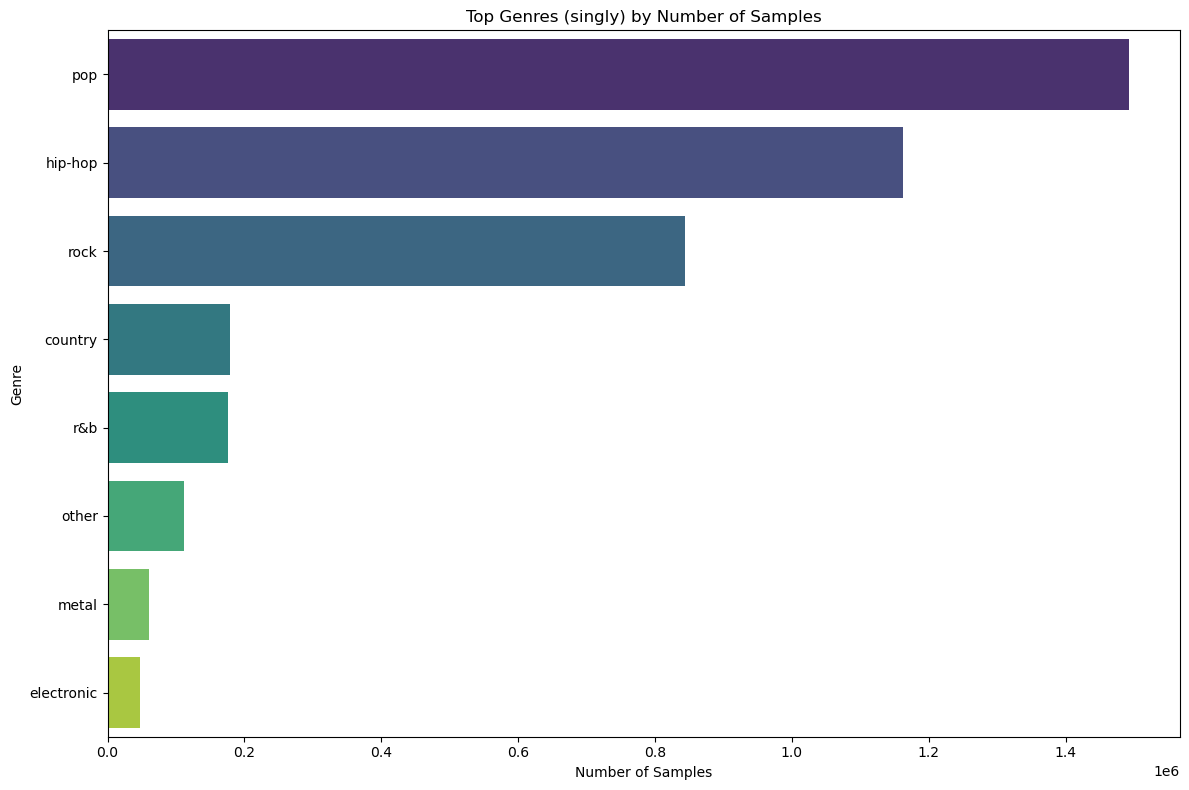

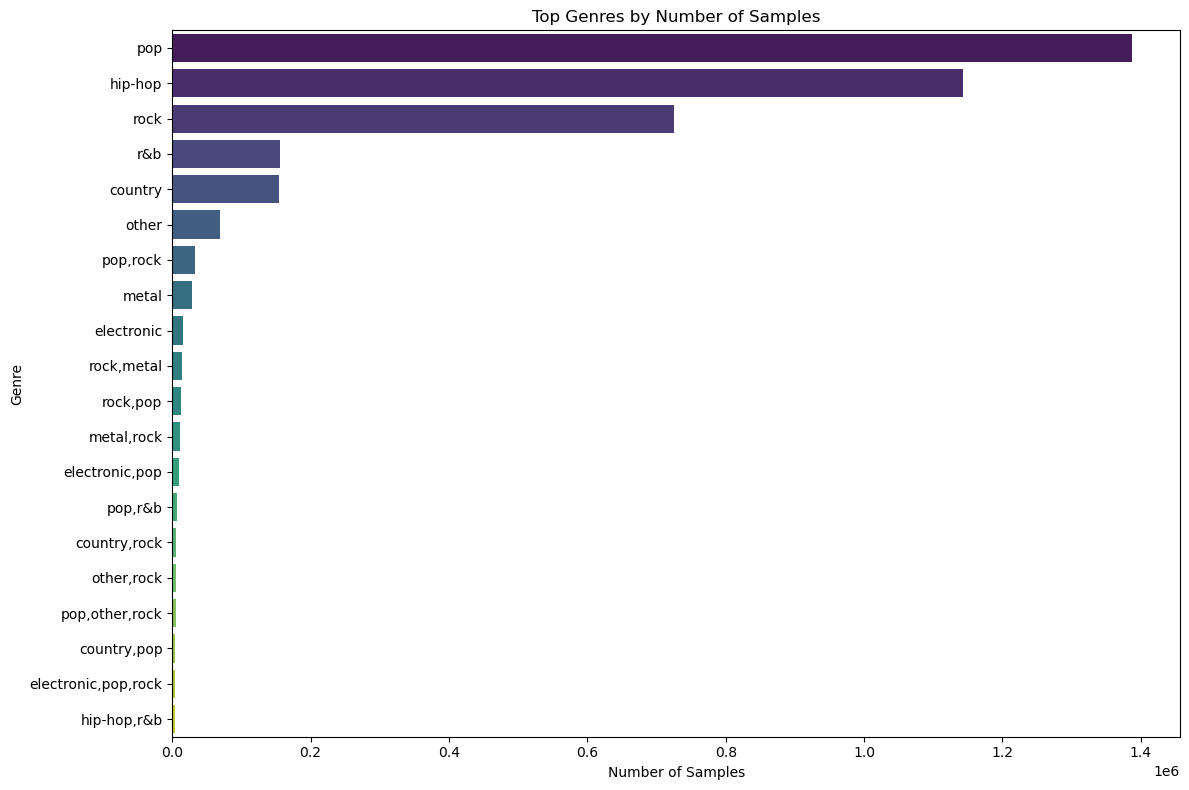

In [45]:
show_top_genres_singly(df_top)
show_top_genres(df_top)

In [46]:
df_top.to_csv('top_genres.csv', index=False)
df_top.to_parquet('top_genres.parquet', index=False)

## Даунсэмплинг второй версии

In [47]:
df_top_downsampled = df_top.copy()

In [48]:
# по аналогии с первой версией
max_samples = int(df_top[df_top['genre']=='r&b']['genre'].count()) # r&b

genre_limits = {
    'pop': max_samples,
    'hip-hop': max_samples,
    'rock': max_samples
}

for genre, limit in genre_limits.items():
    df_top_downsampled = downsample_single_genre_english(df_top_downsampled, genre, limit)

In [49]:
# Баланс языков в этих жанрах
top_3 = ['pop', 'hip-hop', 'rock']

for genre in top_3:
    language_percentages = df_top_downsampled[df_top_downsampled['genre']==genre]['language'].value_counts(normalize=True) * 100
    print(genre, '='*12)
    print(language_percentages.round(2), '\n')
    
# Общий баланс
language_percentages = df_top_downsampled['language'].value_counts(normalize=True) * 100
print('Общий баланс', '='*12)
print(language_percentages.round(2))

pop ============
language
english    80.54
russian    19.46
Name: proportion, dtype: float64 

hip-hop ============
language
russian    69.92
english    30.08
Name: proportion, dtype: float64 

rock ============
language
english    87.61
russian    12.39
Name: proportion, dtype: float64 

Общий баланс ============
language
english    84.68
russian    15.32
Name: proportion, dtype: float64


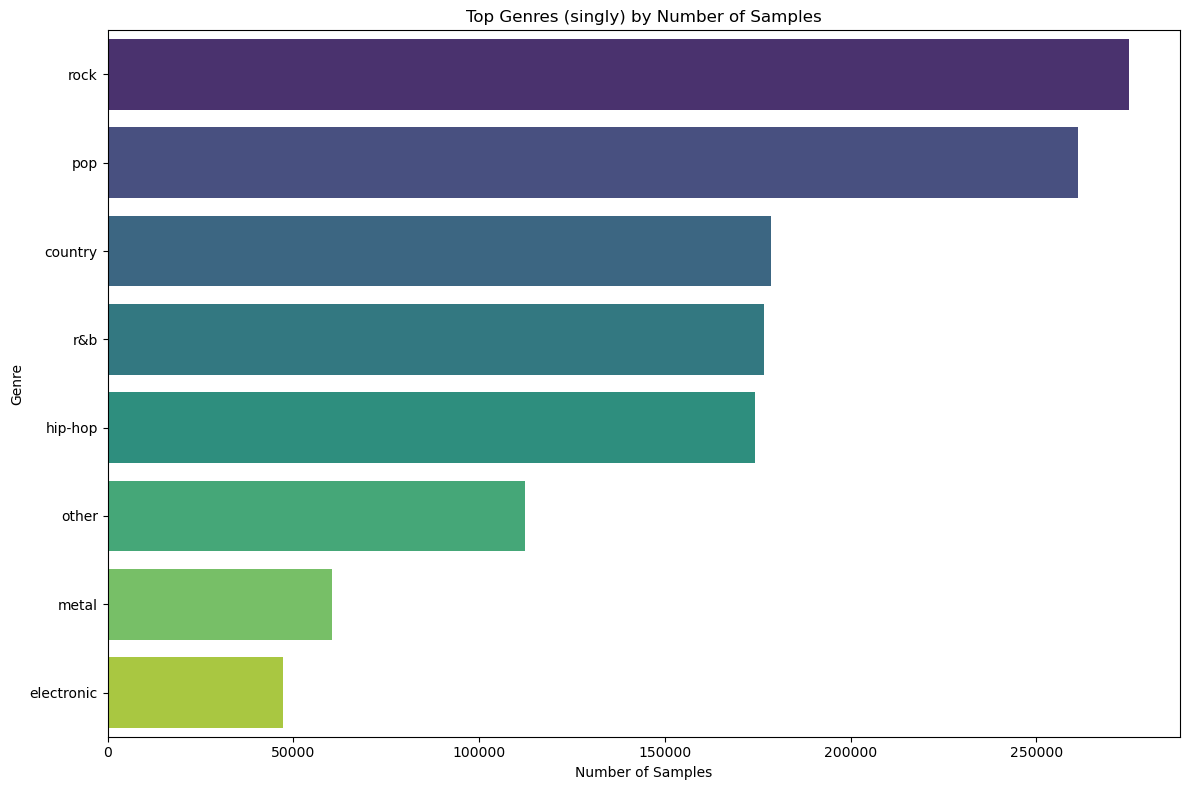

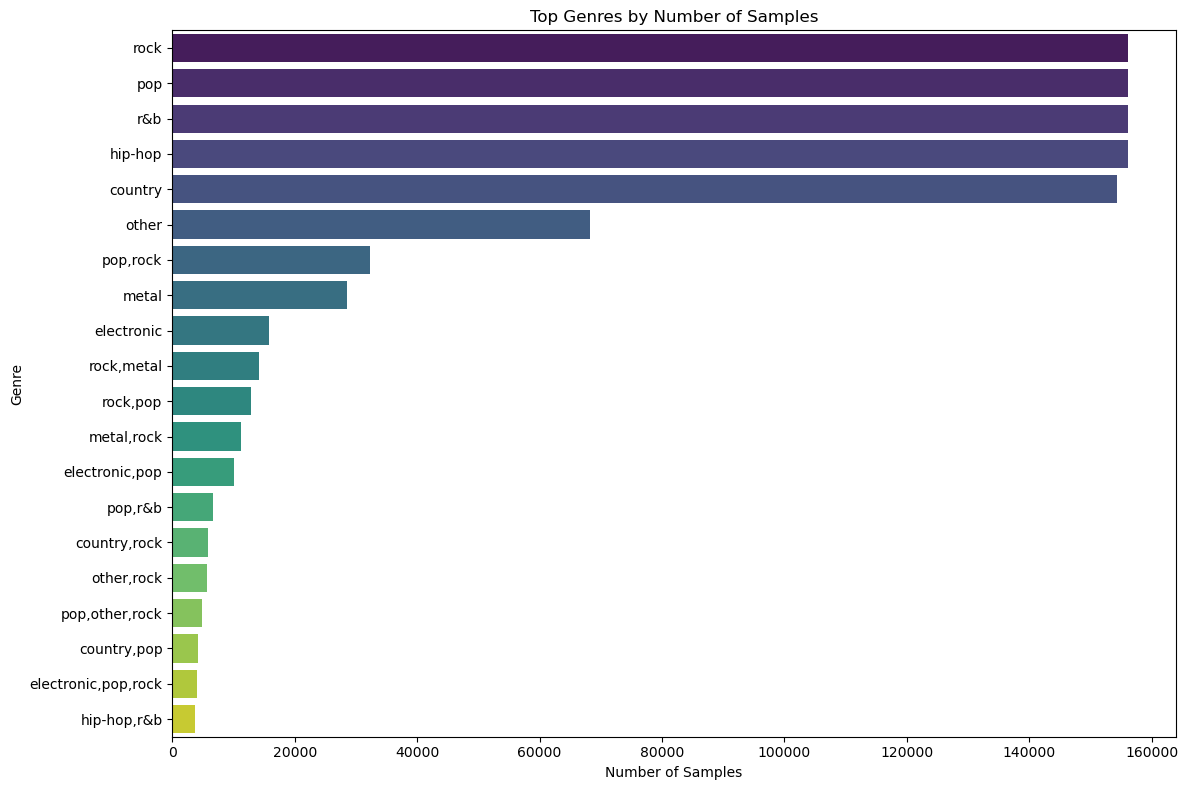

In [50]:
show_top_genres_singly(df_top_downsampled)
show_top_genres(df_top_downsampled)

In [51]:
df_top_downsampled

,genre,lyrics,language
0,"pop,hip-hop,r&b",[Verse 1] This shit remind me of how... look T...,english
1,"electronic,pop","I was looking lost, it was cold outside The wh...",english
2,country,"Ive been exalted, cried from the pulpit but Im...",english
3,r&b,"[Lyrics from Snippet] [blackbear] Drugs, is ki...",english
4,country,A dually diesel pullin' hard with a horse trai...,english
...,...,...,...
1071334,rock,Coagulated gore of cadaveric festers Stagnated...,english
1071335,rock,[Verse 1] Filling massively the ballot box Jus...,english
1071336,rock,"One, two, three, four! Get on up! get on up! G...",english
1071337,rock,In a blanket of sea Neath a canopy of stars Wi...,english


In [52]:
df_top_downsampled.to_csv('top_genres_downsampled.csv', index=False)
df_top_downsampled.to_parquet('top_genres_downsampled.parquet', index=False)